--- Valores Ausentes por Coluna ---
T_ANALF15M            0
T_ATRASO_2_BASICO    18
T_FUND18M            18
AGUA_ESGOTO          18
T_DENS               18
T_LIXO               18
GINI                 18
PPOB                 18
T_FUNDIN18MINF       18
P_FORMAL             18
T_DES18M             18
RAZDEP               18
IDHM                 18
dtype: int64

--- Estatísticas Descritivas ---
        T_ANALF15M  T_ATRASO_2_BASICO    T_FUND18M  AGUA_ESGOTO       T_DENS  \
count  1246.000000        1228.000000  1228.000000   1228.00000  1228.000000   
mean      6.551220          18.350090    49.733941      1.50114    30.115432   
std       4.146762           5.969033    18.386610      2.78929    13.884700   
min       0.000000           3.080000    14.580000      0.00000     0.400000   
25%       3.122500          13.710000    36.210000      0.00000    19.627500   
50%       5.910000          18.855000    47.850000      0.47000    29.920000   
75%       9.080000          22.420000    61.7

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/boxplot_outliers.png'

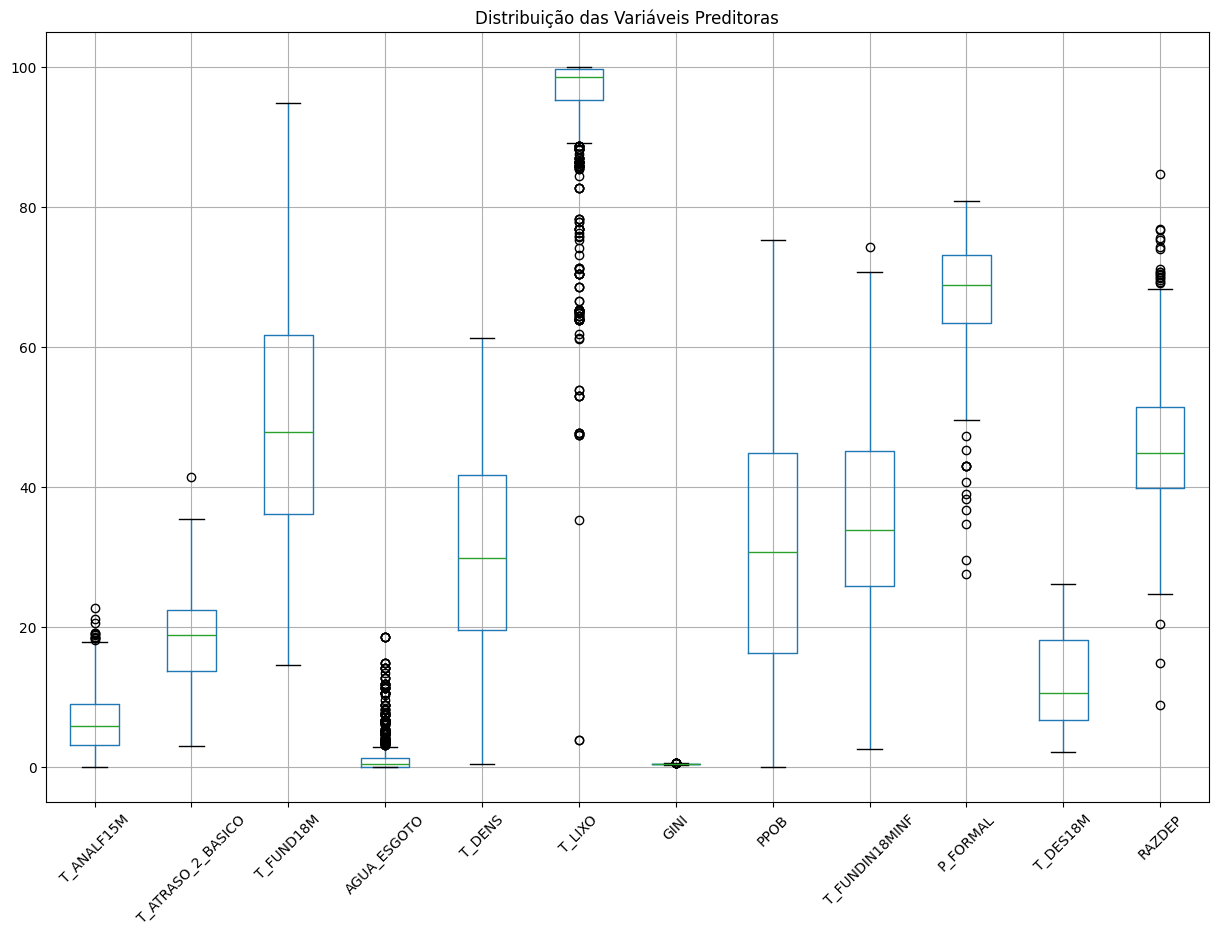

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv('/home/alencaravelar/Desktop/zetta-lab/zetta-lab2/zetta-lab2/data/raw/dados_bh.csv')

# Variáveis selecionadas para o Desafio II
features = ['T_ANALF15M', 'T_ATRASO_2_BASICO', 'T_FUND18M', 'AGUA_ESGOTO', 
            'T_DENS', 'T_LIXO', 'GINI', 'PPOB', 'T_FUNDIN18MINF', 
            'P_FORMAL', 'T_DES18M', 'RAZDEP']
target = 'IDHM'

# 1. Análise de Valores Nulos
print("--- Valores Ausentes por Coluna ---")
print(df[features + [target]].isnull().sum())

# 2. Estatísticas Descritivas (Busca por valores impossíveis ou extremos)
desc = df[features + [target]].describe()
print("\n--- Estatísticas Descritivas ---")
print(desc)

# 3. Identificação de Outliers via IQR (Interquartile Range)
Q1 = df[features + [target]].quantile(0.25)
Q3 = df[features + [target]].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[features + [target]] < (Q1 - 1.5 * IQR)) | (df[features + [target]] > (Q3 + 1.5 * IQR))).sum()
print("\n--- Quantidade de Outliers Detectados ---")
print(outliers)

# 4. Visualização de Distribuição (Boxplots)
# Dica: Execute este bloco no Jupyter para ver a dispersão
plt.figure(figsize=(15, 10))
df[features].boxplot()
plt.xticks(rotation=45)
plt.title("Distribuição das Variáveis Preditoras")
plt.savefig('outputs/boxplot_outliers.png')